# Sensitivity of the *ecal* parameter
This example shows a simple sensitivity analysis, i.e. running SWIM sucessively with the basin-wide *ecal* parameter changed each time. The discharge changes between those runs will be plotted.

In [1]:
# hidden cell to setup
import swimpy, os
%matplotlib inline

project_path = os.path.join(os.path.dirname(swimpy.__file__), '../tests/project')
os.chdir(project_path)
if not os.path.exists('swimpy'):
    p = swimpy.project.setup()

ecal=0.9
ecal=1.0
ecal=1.1


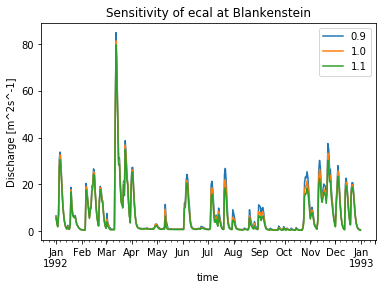

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt

import swimpy

# load the project instance
p = swimpy.Project()

# run for two years and without subcatch
p.config_parameters['nbyr'] = 2
p.basin_parameters['subcatch'] = 0

# run the model while changing the basin-wide ecal parameter
ecal_values = [0.9, 1.0, 1.1]
q = pd.DataFrame()
for ecal in ecal_values:
    p.basin_parameters['ecal'] = ecal
    p.run(quiet=True, save=False)
    # keep daily discharge at Blankenstein station
    q[ecal] = p.station_daily_discharge['BLANKENSTEIN']
    print('ecal=%s' % ecal)

# visualise results
ax = q['1992':].plot()
plt.title('Sensitivity of ecal at Blankenstein')
yl = plt.ylabel('Discharge [m^2s^-1]')

## Convert to a (general) project function
If you are doing this sort of sensitivity testing more often, you can convert this little script to a project function. It is then accessible on the commandline and as method on the *project* instance. Put the below code into your `swimpy/settings.py` file.

In [3]:
def sensitivity_basin_parameter(project, parameter, values, plot=True):
    """Run the model with the parameter set to each value.
    """
    q = pd.DataFrame()
    for val in values:
        project.basin_parameters[parameter] = val
        project.run(quiet=True, save=False)
        q[val] = project.station_daily_discharge['BLANKENSTEIN']
        print('%s=%s' % (parameter, val))
    if plot:
        # visualise results
        ax = q.plot()
        plt.title('Sensitivity of %s at Blankenstein' % parameter)
        yl = plt.ylabel('Discharge [m^2s^-1]')
    return q

In [4]:
# hidden: like adding it to settings.py 
p.settings(sensitivity_basin_parameter)

The function `sensitivity_basin_parameter` is a generalisation of the above script and alows testing the sensitivity of any basin parameter (in the `.bsn` file). You can now use it in a python script, e.g.:

ecal=0.9
ecal=1.0
ecal=1.1


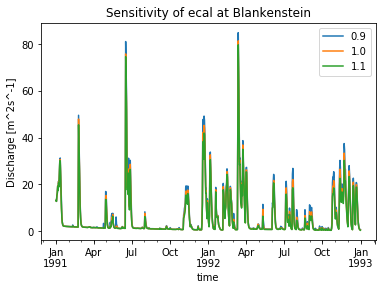

In [5]:
q = p.sensitivity_basin_parameter('ecal', [0.9, 1.0, 1.1])

Or on the commandline, e.g.:
```console
$ swimpy sensitivity_basin_parameter ecal "[0.9, 1.0, 1.1]"
```